In [1]:
# ============================================
# Parkinson's Disease vs Control EEG Classifier
# Full Pipeline: BIDS loading, Preprocessing, ICA, Feature Extraction, ML
# Dataset: ds003490 (BIDS format)
# ============================================

import os
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
from mne.datasets import sample
from mne_bids import BIDSPath, read_raw_bids, get_entity_vals
from mne.preprocessing import ICA, create_eog_epochs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import os
import openneuro

# Define BIDS root folder
bids_root = "PD2"
os.makedirs(bids_root, exist_ok=True)

# Download dataset (all subjects, all sessions)
openneuro.download(dataset="ds003490", target_dir=bids_root)

print("✅ Download complete.")



👋 Hello! This is openneuro-py 2024.2.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds003490 …


📁 Traversing directories for ds003490 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 629 files (5 concurrent downloads). 
✅ Finished downloading ds003490.
 
🧠 Please enjoy your brains.
 
✅ Download complete.


Skipping participants.json: already downloaded.: 100%|##########| 476/476 [00:00<?, ?B/s]

Skipping dataset_description.json: already downloaded.: 100%|##########| 306/306 [00:00<?, ?B/s]

Skipping CHANGES: already downloaded.: 100%|##########| 34.0/34.0 [00:00<?, ?B/s]

Skipping README: already downloaded.: 100%|##########| 820/820 [00:00<?, ?B/s]

Skipping APPLE_PDDys.m: already downloaded.: 100%|##########| 9.63k/9.63k [00:00<?, ?B/s]

Skipping CLASSIFY.m: already downloaded.: 100%|##########| 6.69k/6.69k [00:00<?, ?B/s]

Skipping BV_Chanlocs_60.mat: already downloaded.: 100%|##########| 4.71k/4.71k [00:00<?, ?B/s]

Skipping IMPORT_ME.xlsx: already downloaded.: 100%|##########| 12.4k/12.4k [00:00<?, ?B/s]

Skipping CLASSIFY_DECREMENT.m: already downloaded.: 100%|##########| 2.47k/2.47k [00:00<?, ?B/s]

Skipping ONOFF_4Oddball.mat: already downloaded.: 100%|##########| 386/386 [00:00<?, ?B/s]

Skipping PDDys_4BIDS.xlsx: already downloaded.: 100%|##########| 14.3k/14.3k [00:00<?, ?B/s]

Skipping Run_Thresh_1D.m: already downloaded.: 100%|##########| 1.66k/1.66k [00:00<?, ?B/s]

Skipping Run_Thresh_2D.m: already downloaded.: 100%|##########| 1.93k/1.93k [00:00<?, ?B/s]

Skipping Step2_Get_Random_Effects_ERPs.m: already downloaded.: 100%|##########| 12.4k/12.4k [00:00<?, ?B/s]

Skipping Step3_Plot_TF_n_ERPs.m: already downloaded.: 100%|##########| 33.5k/33.5k [00:00<?, ?B/s]

Skipping Step4_Prep_For_Classification.m: already downloaded.: 100%|##########| 7.39k/7.39k [00:00<?, ?B/s]

Skipping Step5_Classify.m: already downloaded.: 100%|##########| 1.63k/1.63k [00:00<?, ?B/s]

Skipping Step7_PCA_and_Laplace_During_Revisions.m: already downloaded.: 100%|##########| 21.3k/21.3k [00:00<?,…

Skipping Step6_Plot_Classify_Outputs.m: already downloaded.: 100%|##########| 2.29k/2.29k [00:00<?, ?B/s]

Skipping Step1_PreProcess_ODDBALL.m: already downloaded.: 100%|##########| 5.24k/5.24k [00:00<?, ?B/s]

Skipping Step8_Classify_WithDecrements.m: already downloaded.: 100%|##########| 5.07k/5.07k [00:00<?, ?B/s]

Skipping eigenpca.m: already downloaded.: 100%|##########| 5.15k/5.15k [00:00<?, ?B/s]

Skipping jader.m: already downloaded.: 100%|##########| 11.3k/11.3k [00:00<?, ?B/s]

Skipping laplacian_perrinX.m: already downloaded.: 100%|##########| 3.22k/3.22k [00:00<?, ?B/s]

Skipping startup.m: already downloaded.: 100%|##########| 148/148 [00:00<?, ?B/s]

Skipping shadedErrorBar.m: already downloaded.: 100%|##########| 4.27k/4.27k [00:00<?, ?B/s]

Skipping IADS_4_3AOB.mat: already downloaded.: 100%|##########| 1.04M/1.04M [00:00<?, ?B/s]

Skipping Rest_With_3AOB.m: already downloaded.: 100%|##########| 9.21k/9.21k [00:00<?, ?B/s]

Skipping sub-001_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-001_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-001_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-001_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.45M/1.45M [00:00<?, ?B/s]

Skipping sub-001_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-001_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-001_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-001_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 75.2M/75.2M [00:00<?, ?B/s]

Skipping sub-001_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-001_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-001_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-001_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.37M/1.37M [00:00<?, ?B/s]

Skipping sub-001_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-001_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-001_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-002_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-002_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-001_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 69.7M/69.7M [00:00<?, ?B/s]

Skipping sub-002_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-002_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-002_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-002_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.55M/1.55M [00:00<?, ?B/s]

Skipping sub-002_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-002_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 81.7M/81.7M [00:00<?, ?B/s]

Skipping sub-002_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-002_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-002_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-002_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.40M/1.40M [00:00<?, ?B/s]

Skipping sub-002_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-002_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-002_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-002_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 71.7M/71.7M [00:00<?, ?B/s]

Skipping sub-003_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-003_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-003_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-003_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.63M/1.63M [00:00<?, ?B/s]

Skipping sub-003_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-003_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-003_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-003_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 87.2M/87.2M [00:00<?, ?B/s]

Skipping sub-004_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-004_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-004_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-004_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.59M/1.59M [00:00<?, ?B/s]

Skipping sub-004_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-004_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-004_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-004_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-004_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-004_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 84.9M/84.9M [00:00<?, ?B/s]

Skipping sub-004_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-004_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.65M/1.65M [00:00<?, ?B/s]

Skipping sub-004_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-004_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-004_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 88.6M/88.6M [00:00<?, ?B/s]

Skipping sub-005_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-005_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-004_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-005_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-005_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 54.8M/54.8M [00:00<?, ?B/s]

Skipping sub-005_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-005_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-005_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.10M/1.10M [00:00<?, ?B/s]

Skipping sub-005_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 13.5k/13.5k [00:00<?, ?B/s…

Skipping sub-006_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-006_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-006_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.53M/1.53M [00:00<?, ?B/s]

Skipping sub-006_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-006_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-006_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-006_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-006_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 80.4M/80.4M [00:00<?, ?B/s]

Skipping sub-006_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-006_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-006_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-006_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-006_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 2.18M/2.18M [00:00<?, ?B/s]

Skipping sub-006_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-006_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-007_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-007_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-007_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.49M/1.49M [00:00<?, ?B/s]

Skipping sub-007_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-007_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-007_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-007_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-007_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-006_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 124M/124M [00:00<?, ?B/s]

Skipping sub-007_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 77.6M/77.6M [00:00<?, ?B/s]

Skipping sub-007_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-007_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-007_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.75M/1.75M [00:00<?, ?B/s]

Skipping sub-007_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-007_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-007_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-008_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-008_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-008_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-008_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-008_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-008_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-008_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.68M/1.68M [00:00<?, ?B/s]

Skipping sub-007_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 95.4M/95.4M [00:00<?, ?B/s]

Skipping sub-008_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-008_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-008_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-008_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 90.8M/90.8M [00:00<?, ?B/s]

Skipping sub-008_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.43M/1.43M [00:00<?, ?B/s]

Skipping sub-008_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-008_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-008_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-009_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-009_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-008_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 73.7M/73.7M [00:00<?, ?B/s]

Skipping sub-009_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-009_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-009_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.11M/1.11M [00:00<?, ?B/s]

Skipping sub-009_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 60.9M/60.9M [00:00<?, ?B/s]

Skipping sub-009_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-009_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 10.4k/10.4k [00:00<?, ?B/s…

Skipping sub-009_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-009_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-009_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-009_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-009_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.44M/1.44M [00:00<?, ?B/s]

Skipping sub-009_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-009_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 74.3M/74.3M [00:00<?, ?B/s]

Skipping sub-009_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-010_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-010_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-010_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-010_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-010_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.41M/1.41M [00:00<?, ?B/s]

Skipping sub-010_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-010_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-010_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.39M/1.39M [00:00<?, ?B/s]

Skipping sub-010_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-010_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-010_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-010_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-010_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 72.5M/72.5M [00:00<?, ?B/s]

Skipping sub-010_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 71.5M/71.5M [00:00<?, ?B/s]

Skipping sub-010_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-010_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-011_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-011_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-011_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-011_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.44M/1.44M [00:00<?, ?B/s]

Skipping sub-011_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-011_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-011_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-011_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-011_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-011_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 545/545 [00:00<?, ?B/s]

Skipping sub-011_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 74.8M/74.8M [00:00<?, ?B/s]

Skipping sub-011_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-011_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.45M/1.45M [00:00<?, ?B/s]

Skipping sub-011_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-011_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-011_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 75.0M/75.0M [00:00<?, ?B/s]

Skipping sub-012_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-012_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-012_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.47M/1.47M [00:00<?, ?B/s]

Skipping sub-012_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-012_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-012_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-012_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-012_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-012_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-012_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-012_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.51M/1.51M [00:00<?, ?B/s]

Skipping sub-012_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 76.8M/76.8M [00:00<?, ?B/s]

Skipping sub-012_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-012_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-012_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-012_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 79.4M/79.4M [00:00<?, ?B/s]

Skipping sub-013_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-013_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-013_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-013_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.45M/1.45M [00:00<?, ?B/s]

Skipping sub-013_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-013_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-013_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 17.0k/17.0k [00:00<?, ?B/s…

Skipping sub-013_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-013_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-013_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 75.0M/75.0M [00:00<?, ?B/s]

Skipping sub-013_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-013_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-013_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.38M/1.38M [00:00<?, ?B/s]

Skipping sub-013_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-013_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 70.8M/70.8M [00:00<?, ?B/s]

Skipping sub-014_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-014_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-013_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-014_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-014_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.44M/1.44M [00:00<?, ?B/s]

Skipping sub-014_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-014_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-014_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-014_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-014_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 74.4M/74.4M [00:00<?, ?B/s]

Skipping sub-014_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-014_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-014_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.52M/1.52M [00:00<?, ?B/s]

Skipping sub-014_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-015_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-014_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-014_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.6k/16.6k [00:00<?, ?B/s…

Skipping sub-014_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 80.1M/80.1M [00:00<?, ?B/s]

Skipping sub-015_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-015_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-015_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.45M/1.45M [00:00<?, ?B/s]

Skipping sub-015_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-015_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-015_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-015_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-015_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-015_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-015_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 75.5M/75.5M [00:00<?, ?B/s]

Skipping sub-015_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-015_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.50M/1.50M [00:00<?, ?B/s]

Skipping sub-015_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-015_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 78.4M/78.4M [00:00<?, ?B/s]

Skipping sub-016_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-015_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-016_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-016_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-016_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-016_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.51M/1.51M [00:00<?, ?B/s]

Skipping sub-016_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-016_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-016_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-016_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-016_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 79.4M/79.4M [00:00<?, ?B/s]

Skipping sub-016_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-016_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-016_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.71M/1.71M [00:00<?, ?B/s]

Skipping sub-016_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 92.7M/92.7M [00:00<?, ?B/s]

Skipping sub-016_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-016_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-017_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-017_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-017_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-017_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.61M/1.61M [00:00<?, ?B/s]

Skipping sub-017_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-017_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-017_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-017_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-017_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-017_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-017_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 86.0M/86.0M [00:00<?, ?B/s]

Skipping sub-017_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-017_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-017_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.44M/1.44M [00:00<?, ?B/s]

Skipping sub-017_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-017_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 74.4M/74.4M [00:00<?, ?B/s]

Skipping sub-018_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-018_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-018_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-018_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.45M/1.45M [00:00<?, ?B/s]

Skipping sub-018_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-018_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-018_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-018_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-018_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-018_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 75.0M/75.0M [00:00<?, ?B/s]

Skipping sub-018_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-018_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.40M/1.40M [00:00<?, ?B/s]

Skipping sub-018_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-018_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-018_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 72.0M/72.0M [00:00<?, ?B/s]

Skipping sub-018_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-019_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-019_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-019_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-019_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 2.09M/2.09M [00:00<?, ?B/s]

Skipping sub-019_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-019_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-019_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 24.1k/24.1k [00:00<?, ?B/s…

Skipping sub-019_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-019_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-019_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-019_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.43M/1.43M [00:00<?, ?B/s]

Skipping sub-019_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-019_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 110M/110M [00:00<?, ?B/s]

Skipping sub-019_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-019_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 17.0k/17.0k [00:00<?, ?B/s…

Skipping sub-020_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-020_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-019_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 73.8M/73.8M [00:00<?, ?B/s]

Skipping sub-020_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-020_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-020_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.49M/1.49M [00:00<?, ?B/s]

Skipping sub-020_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-020_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-020_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-020_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 77.8M/77.8M [00:00<?, ?B/s]

Skipping sub-020_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-020_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-020_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.42M/1.42M [00:00<?, ?B/s]

Skipping sub-020_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-020_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 72.9M/72.9M [00:00<?, ?B/s]

Skipping sub-020_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-020_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-021_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-021_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-021_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-021_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-021_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-021_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.38M/1.38M [00:00<?, ?B/s]

Skipping sub-021_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-021_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-021_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 70.5M/70.5M [00:00<?, ?B/s]

Skipping sub-021_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-021_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-021_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.39M/1.39M [00:00<?, ?B/s]

Skipping sub-021_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 70.9M/70.9M [00:00<?, ?B/s]

Skipping sub-021_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-021_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-021_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-022_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-022_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-022_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-022_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.59M/1.59M [00:00<?, ?B/s]

Skipping sub-022_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-022_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-022_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-022_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-022_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-022_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-022_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 84.5M/84.5M [00:00<?, ?B/s]

Skipping sub-022_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-022_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-022_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.99M/1.99M [00:00<?, ?B/s]

Skipping sub-022_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-023_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-023_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-023_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-022_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 111M/111M [00:00<?, ?B/s]

Skipping sub-023_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.32M/1.32M [00:00<?, ?B/s]

Skipping sub-023_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-023_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-023_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-023_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-023_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-023_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 66.3M/66.3M [00:00<?, ?B/s]

Skipping sub-023_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-023_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-023_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.29M/1.29M [00:00<?, ?B/s]

Skipping sub-023_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-023_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 64.8M/64.8M [00:00<?, ?B/s]

Skipping sub-023_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-024_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-024_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-024_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-024_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.32M/1.32M [00:00<?, ?B/s]

Skipping sub-024_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-024_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-024_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-024_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-024_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 66.2M/66.2M [00:00<?, ?B/s]

Skipping sub-024_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-024_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-024_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.34M/1.34M [00:00<?, ?B/s]

Skipping sub-024_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-024_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-024_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 68.1M/68.1M [00:00<?, ?B/s]

Skipping sub-024_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.6k/16.6k [00:00<?, ?B/s…

Skipping sub-025_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-025_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-025_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-025_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.49M/1.49M [00:00<?, ?B/s]

Skipping sub-025_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-025_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-025_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-025_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-025_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-025_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 77.5M/77.5M [00:00<?, ?B/s]

Skipping sub-025_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.52M/1.52M [00:00<?, ?B/s]

Skipping sub-025_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-025_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-025_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-025_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-025_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 79.9M/79.9M [00:00<?, ?B/s]

Skipping sub-026_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-026_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-026_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-026_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.44M/1.44M [00:00<?, ?B/s]

Skipping sub-026_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-026_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-026_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-026_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-026_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-026_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 74.3M/74.3M [00:00<?, ?B/s]

Skipping sub-026_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.60M/1.60M [00:00<?, ?B/s]

Skipping sub-026_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-026_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-026_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-026_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-026_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 85.3M/85.3M [00:00<?, ?B/s]

Skipping sub-027_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-027_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-027_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 547/547 [00:00<?, ?B/s]

Skipping sub-027_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.56M/1.56M [00:00<?, ?B/s]

Skipping sub-027_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-027_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-027_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-027_ses-02_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-027_ses-02_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-027_ses-02_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-027_ses-02_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-027_ses-02_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.52M/1.52M [00:00<?, ?B/s]

Skipping sub-027_ses-02_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-027_ses-02_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-027_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 82.9M/82.9M [00:00<?, ?B/s]

Skipping sub-028_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-028_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-027_ses-02_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 79.6M/79.6M [00:00<?, ?B/s]

Skipping sub-028_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-028_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.39M/1.39M [00:00<?, ?B/s]

Skipping sub-028_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-028_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-029_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-028_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-029_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-029_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-028_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 71.1M/71.1M [00:00<?, ?B/s]

Skipping sub-029_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-029_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-029_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.40M/1.40M [00:00<?, ?B/s]

Skipping sub-029_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 71.6M/71.6M [00:00<?, ?B/s]

Skipping sub-029_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-030_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

In [3]:
import os

subjects = [d for d in os.listdir(bids_root) if d.startswith("sub-")]
print(f"👥 Subjects found ({len(subjects)} total):")
for subject in subjects:
    print(f" - {subject}")

👥 Subjects found (50 total):
 - sub-021
 - sub-026
 - sub-019
 - sub-010
 - sub-017
 - sub-028
 - sub-043
 - sub-044
 - sub-016
 - sub-029
 - sub-011
 - sub-027
 - sub-018
 - sub-020
 - sub-045
 - sub-042
 - sub-002
 - sub-005
 - sub-033
 - sub-034
 - sub-050
 - sub-035
 - sub-032
 - sub-004
 - sub-003
 - sub-047
 - sub-040
 - sub-049
 - sub-025
 - sub-022
 - sub-014
 - sub-013
 - sub-048
 - sub-041
 - sub-046
 - sub-012
 - sub-015
 - sub-023
 - sub-024
 - sub-039
 - sub-006
 - sub-001
 - sub-008
 - sub-037
 - sub-030
 - sub-031
 - sub-009
 - sub-036
 - sub-038
 - sub-007


Skipping sub-030_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-030_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-030_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-030_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.49M/1.49M [00:00<?, ?B/s]

Skipping sub-030_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-030_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-031_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-031_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-030_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 77.7M/77.7M [00:00<?, ?B/s]

Skipping sub-031_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.59M/1.59M [00:00<?, ?B/s]

Skipping sub-031_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-031_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-031_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-031_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-031_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 84.8M/84.8M [00:00<?, ?B/s]

Skipping sub-032_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-032_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-032_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-032_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.58M/1.58M [00:00<?, ?B/s]

Skipping sub-032_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-032_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-032_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 17.0k/17.0k [00:00<?, ?B/s…

Skipping sub-033_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-033_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-033_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-033_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-033_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-033_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 2.10M/2.10M [00:00<?, ?B/s]

Skipping sub-032_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 83.8M/83.8M [00:00<?, ?B/s]

Skipping sub-033_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-034_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-034_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-034_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-034_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.54M/1.54M [00:00<?, ?B/s]

Skipping sub-034_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-034_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-033_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 119M/119M [00:00<?, ?B/s]

Skipping sub-034_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-035_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-035_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-035_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 546/546 [00:00<?, ?B/s]

Skipping sub-035_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-035_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.54M/1.54M [00:00<?, ?B/s]

Skipping sub-035_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-034_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 81.6M/81.6M [00:00<?, ?B/s]

Skipping sub-035_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-036_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-036_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-036_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-035_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 81.7M/81.7M [00:00<?, ?B/s]

Skipping sub-036_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.49M/1.49M [00:00<?, ?B/s]

Skipping sub-036_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-036_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-036_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-037_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-037_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-036_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 77.5M/77.5M [00:00<?, ?B/s]

Skipping sub-037_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-037_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.38M/1.38M [00:00<?, ?B/s]

Skipping sub-037_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-037_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-037_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-037_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 70.3M/70.3M [00:00<?, ?B/s]

Skipping sub-038_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-038_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-038_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-038_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.34M/1.34M [00:00<?, ?B/s]

Skipping sub-038_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-038_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-038_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-039_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-039_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-038_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 67.9M/67.9M [00:00<?, ?B/s]

Skipping sub-039_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-039_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-039_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.65M/1.65M [00:00<?, ?B/s]

Skipping sub-039_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-040_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-039_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-040_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-039_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 88.5M/88.5M [00:00<?, ?B/s]

Skipping sub-040_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-040_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-040_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.52M/1.52M [00:00<?, ?B/s]

Skipping sub-040_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-040_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-041_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-041_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-040_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 79.8M/79.8M [00:00<?, ?B/s]

Skipping sub-041_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-041_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-041_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.35M/1.35M [00:00<?, ?B/s]

Skipping sub-041_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 68.7M/68.7M [00:00<?, ?B/s]

Skipping sub-041_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-041_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-042_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-042_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-042_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-042_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.53M/1.53M [00:00<?, ?B/s]

Skipping sub-042_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-042_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-042_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-043_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-042_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 80.3M/80.3M [00:00<?, ?B/s]

Skipping sub-043_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-043_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.41M/1.41M [00:00<?, ?B/s]

Skipping sub-043_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-043_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-043_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-043_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 72.9M/72.9M [00:00<?, ?B/s]

Skipping sub-044_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-043_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-044_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-044_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-044_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

## Step 1: Define Feature Extraction Function

In [4]:
def extract_band_power_epochs(epochs, bands=[(1, 4), (4, 8), (8, 13), (13, 30)]):
    psd = epochs.compute_psd()
    psd_data, freqs = psd.get_data(return_freqs=True)

    X = []
    for trial in psd_data:  # loop over epochs
        features = []
        for fmin, fmax in bands:
            idx = np.logical_and(freqs >= fmin, freqs <= fmax)
            band_power = trial[:, idx].mean(axis=1)  # average power per channel
            features.extend(band_power)
        X.append(features)
    return X

Skipping sub-044_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.39M/1.39M [00:00<?, ?B/s]

Skipping sub-044_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-045_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-044_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-045_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-045_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-044_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 71.2M/71.2M [00:00<?, ?B/s]

Skipping sub-045_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-045_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-045_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.37M/1.37M [00:00<?, ?B/s]

Skipping sub-045_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.6k/16.6k [00:00<?, ?B/s…

Skipping sub-045_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 70.0M/70.0M [00:00<?, ?B/s]

Skipping sub-046_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-046_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-046_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-046_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-046_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.41M/1.41M [00:00<?, ?B/s]

Skipping sub-046_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-046_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-047_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-046_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 72.8M/72.8M [00:00<?, ?B/s]

Skipping sub-047_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-047_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-047_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 2.29M/2.29M [00:00<?, ?B/s]

Skipping sub-047_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-047_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-047_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 65.7M/65.7M [00:00<?, ?B/s]

Skipping sub-047_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.8k/16.8k [00:00<?, ?B/s…

Skipping sub-048_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-048_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-048_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-048_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.48M/1.48M [00:00<?, ?B/s]

Skipping sub-048_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-048_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-049_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-048_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.7k/16.7k [00:00<?, ?B/s…

Skipping sub-049_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-048_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 77.3M/77.3M [00:00<?, ?B/s]

Skipping sub-049_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 549/549 [00:00<?, ?B/s]

Skipping sub-049_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-049_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-049_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.36M/1.36M [00:00<?, ?B/s]

Skipping sub-049_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 69.0M/69.0M [00:00<?, ?B/s]

Skipping sub-049_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

Skipping sub-050_ses-01_task-Rest_channels.tsv: already downloaded.: 100%|##########| 787/787 [00:00<?, ?B/s]

Skipping sub-050_ses-01_task-Rest_coordsystem.json: already downloaded.: 100%|##########| 141/141 [00:00<?, ?B…

Skipping sub-050_ses-01_task-Rest_eeg.json: already downloaded.: 100%|##########| 548/548 [00:00<?, ?B/s]

Skipping sub-050_ses-01_task-Rest_events.json: already downloaded.: 100%|##########| 137/137 [00:00<?, ?B/s]

Skipping sub-050_ses-01_task-Rest_eeg.set: already downloaded.: 100%|##########| 1.46M/1.46M [00:00<?, ?B/s]

Skipping sub-050_ses-01_task-Rest_electrodes.tsv: already downloaded.: 100%|##########| 1.45k/1.45k [00:00<?, …

Skipping sub-050_ses-01_task-Rest_events.tsv: already downloaded.: 100%|##########| 16.9k/16.9k [00:00<?, ?B/s…

participants.tsv:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Skipping sub-050_ses-01_task-Rest_eeg.fdt: already downloaded.: 100%|##########| 76.1M/76.1M [00:00<?, ?B/s]

## Step 2: Preprocess and Extract for Subject

In [5]:
def process_subject(subject, session, label, bids_root, duration=2.0, overlap=1.0):
    try:
        bids_path = BIDSPath(
            root=bids_root, subject=subject, session=session,
            task='rest', datatype='eeg', suffix='eeg'
        )
        raw = read_raw_bids(bids_path=bids_path, verbose=False)

        # Handle missing or mislabeled channels
        raw.set_channel_types({
            "EXG1": "eog", "EXG2": "eog", "EXG3": "eog", "EXG4": "eog",
            "EXG5": "eog", "EXG6": "eog", "EXG7": "eog", "EXG8": "eog"
        })
        raw.set_montage("standard_1020", on_missing="ignore")

        raw.load_data()
        raw.filter(1., 40.)
        raw.notch_filter(60.)
        raw.set_eeg_reference('average')

        # ICA
        ica = ICA(n_components=20, random_state=97)
        ica.fit(raw)
        try:
            eog_epochs = create_eog_epochs(raw)
            eog_inds, _ = ica.find_bads_eog(eog_epochs)
            ica.exclude = eog_inds
        except Exception:
            ica.exclude = []
        raw = ica.apply(raw)

        # Epoching
        epochs = mne.make_fixed_length_epochs(raw, duration=duration, overlap=overlap, preload=True)

        if len(epochs) == 0:
            print(f"No epochs for {subject}, session {session}")
            return [], []

        # Feature extraction
        X_subject = extract_band_power_epochs(epochs)
        y_subject = [label] * len(X_subject)
        return X_subject, y_subject

    except Exception as e:
        if "number of columns changed" in str(e):
            print(f"❌ Skipping corrupted TSV file for {subject}, session {session}: {e}")
        else:
            print(f"❌ Failed to process {subject}, session {session}: {e}")
        return [], []

## Step 3: Loop Over All Subjects

In [6]:
import os
print("✅ Dataset root:", bids_root)
print("📁 Available subject folders:", os.listdir(bids_root))
        

✅ Dataset root: PD2
📁 Available subject folders: ['sub-021', 'sub-026', 'sub-019', 'sub-010', 'sub-017', 'sub-028', 'sub-043', 'sub-044', 'sub-016', 'sub-029', 'sub-011', 'sub-027', 'sub-018', 'sub-020', 'sub-045', 'sub-042', '.DS_Store', 'CHANGES', 'code', 'sub-002', 'sub-005', 'sub-033', 'sub-034', 'sub-050', 'sub-035', 'sub-032', 'sub-004', 'stimuli', 'README', 'sub-003', 'sub-047', 'sub-040', 'sub-049', 'sub-025', 'sub-022', 'sub-014', 'sub-013', 'sub-048', 'sub-041', 'sub-046', 'sub-012', 'sub-015', 'sub-023', 'sub-024', 'dataset_description.json', 'participants50.tsv', 'participants.json', 'participants.tsv', 'sub-039', 'sub-006', 'sub-001', 'sub-008', 'sub-037', 'sub-030', 'sub-031', 'sub-009', 'sub-036', 'sub-038', 'sub-007']


In [7]:
import os
import os.path as op
from glob import glob
import pandas as pd

bids_root = "PD2"
participants_path = op.join(bids_root, "participants.tsv")

# Load participants and labels
participants_df = pd.read_csv(participants_path, sep='\t')
label_dict = {
    row['participant_id'].replace("sub-", ""): 1 if row['Group'].strip().upper() == "PD" else 0
    for _, row in participants_df.iterrows()
}

# Get all subject folders starting with "sub-"
all_subjects = sorted([
    name.replace("sub-", "")
    for name in os.listdir(bids_root)
    if name.startswith("sub-") and os.path.isdir(op.join(bids_root, name))
])

# Filter only subjects present in participants.tsv
all_subjects = [sub for sub in all_subjects if sub in label_dict]

print(f"Found {len(all_subjects)} subjects with labels.")

def find_task_name(subject, session):
    eeg_dir = op.join(bids_root, f"sub-{subject}", f"ses-{session}", "eeg")
    if not op.exists(eeg_dir):
        return None
    for fname in os.listdir(eeg_dir):
        if fname.endswith(".set"):
            for part in fname.split("_"):
                if part.startswith("task-"):
                    return part.replace("task-", "")
    return None

# Loop over all subjects and sessions, print info
for subject in all_subjects:
    label = label_dict[subject]
    subj_path = op.join(bids_root, f"sub-{subject}")
    session_dirs = glob(op.join(subj_path, "ses-*"))
    sessions = [op.basename(s).replace("ses-", "") for s in session_dirs]
    if not sessions:
        sessions = [None]

    for session in sessions:
        task = find_task_name(subject, session)
        print(f"Subject: {subject}, Session: {session}, Task: {task}, Label: {label}")


Found 50 subjects with labels.
Subject: 001, Session: 02, Task: Rest, Label: 1
Subject: 001, Session: 01, Task: Rest, Label: 1
Subject: 002, Session: 02, Task: Rest, Label: 1
Subject: 002, Session: 01, Task: Rest, Label: 1
Subject: 003, Session: 01, Task: Rest, Label: 0
Subject: 004, Session: 02, Task: Rest, Label: 1
Subject: 004, Session: 01, Task: Rest, Label: 1
Subject: 005, Session: 01, Task: Rest, Label: 0
Subject: 006, Session: 02, Task: Rest, Label: 1
Subject: 006, Session: 01, Task: Rest, Label: 1
Subject: 007, Session: 02, Task: Rest, Label: 1
Subject: 007, Session: 01, Task: Rest, Label: 1
Subject: 008, Session: 02, Task: Rest, Label: 1
Subject: 008, Session: 01, Task: Rest, Label: 1
Subject: 009, Session: 02, Task: Rest, Label: 1
Subject: 009, Session: 01, Task: Rest, Label: 1
Subject: 010, Session: 02, Task: Rest, Label: 1
Subject: 010, Session: 01, Task: Rest, Label: 1
Subject: 011, Session: 02, Task: Rest, Label: 1
Subject: 011, Session: 01, Task: Rest, Label: 1
Subject: 

In [8]:
def find_all_valid_set_files(subject):
    subject_dir = op.join(bids_root, f"sub-{subject}")
    set_files = glob(op.join(subject_dir, "ses-*", "eeg", "*.set"))
    return set_files


In [9]:
def find_task_name(subject, session):
    eeg_dir = op.join(bids_root, f"sub-{subject}", f"ses-{session}", "eeg")
    if not op.exists(eeg_dir):
        print(f"⛔ Missing EEG directory: {eeg_dir}")
        return None
    files = os.listdir(eeg_dir)
    if not files:
        print(f"⛔ Empty EEG directory: {eeg_dir}")
    for fname in files:
        if fname.endswith(".set"):
            print(f"📄 Found .set file: {fname}")
            for part in fname.split("_"):
                if part.startswith("task-"):
                    return part.replace("task-", "")
    print(f"❌ No task-*.set file found for subject {subject}, session {session}")
    return None


In [10]:
import os
import os.path as op
from glob import glob
import pandas as pd
import mne
import numpy as np
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Define the BIDS root directory for your LOCAL MACHINE
bids_root = "/Users/calebcooper/Downloads/PD2"
participants_path = op.join(bids_root, "participants.tsv")

# Load the participants dataframe
try:
    participants_df = pd.read_csv(participants_path, sep='\t')
except FileNotFoundError:
    print(f"Error: participants.tsv not found at {participants_path}. Please check the path.")
    exit()

# Convert 'sess1_Med' and 'sess2_Med' columns to string type
participants_df['sess1_Med'] = participants_df['sess1_Med'].astype(str)
participants_df['sess2_Med'] = participants_df['sess2_Med'].astype(str)

# Create a dictionary for participant labels (PD=1, CTL=0)
label_dict = {
    row['participant_id'].replace("sub-", ""): 1 if row['Group'].strip().upper() == "PD" else 0
    for _, row in participants_df.iterrows()
}

all_subjects = sorted([
    row['participant_id'].replace("sub-", "")
    for _, row in participants_df.iterrows()
])

print(f"📁 Found {len(all_subjects)} subjects from participants.tsv: {all_subjects}")

def find_task_name(subject_id, session_id):
    eeg_dir = op.join(bids_root, f"sub-{subject_id}", f"ses-{session_id}", "eeg")
    if not op.exists(eeg_dir):
        return None
    set_files = glob(op.join(eeg_dir, f"sub-{subject_id}_ses-{session_id}_task-*.set"))
    if not set_files:
        set_files = glob(op.join(eeg_dir, "*.set"))
    if set_files:
        fname = op.basename(set_files[0])
        parts = fname.split('_')
        for part in parts:
            if part.startswith("task-"):
                return part.replace("task-", "")
        return "Rest"
    return None

# Counters for summary
loaded_count = 0
skipped_count = 0
pd_count = 0
ctl_count = 0

X_temp, y_temp = [], []  # Store raw data segments (may have varying lengths) and labels
max_samples_found = 0  # Track the max samples of successfully loaded data

missing_files = []  # List of missing files for reporting
corrupt_files = []  # List of corrupt files for reporting
mismatch_files = []  # List of files with mismatched sample counts

print("\nProcessing EEG data...")
for _, row in participants_df.iterrows():
    subject = row['participant_id'].replace("sub-", "")
    if subject not in label_dict:
        skipped_count += 2
        continue

    label = label_dict[subject]
    
    # Process session 1
    sess1_status = row['sess1_Med'].strip().upper()
    if sess1_status != "N/A":
        session = '01'
        task = find_task_name(subject, session)
        if task:
            eeg_file_path = op.join(bids_root, f"sub-{subject}", f"ses-{session}", "eeg", f"sub-{subject}_ses-{session}_task-{task}_eeg.set")
            if not op.isfile(eeg_file_path):
                missing_files.append(eeg_file_path)
                skipped_count += 1
                continue

            try:
                raw = mne.io.read_raw_eeglab(eeg_file_path, preload=True, verbose=False)
                if 'boundary' in raw.annotations.description:
                    print(f"  Note: Data for {op.relpath(eeg_file_path, bids_root)} contains 'boundary' events.")
                
                raw.filter(1., 40., fir_design='firwin', verbose=False)
                
                data_segment = raw.get_data().mean(axis=0)  # This is 1D array (num_samples,)
                
                # Check for sample count mismatch and log it
                expected_samples = 24999978  # Example of expected sample length, you may need to adjust this dynamically
                if data_segment.shape[0] != expected_samples:
                    mismatch_files.append((eeg_file_path, data_segment.shape[0], expected_samples))
                    # Pad or truncate the data
                    if data_segment.shape[0] < expected_samples:
                        data_segment = np.pad(data_segment, (0, expected_samples - data_segment.shape[0]), 'constant', constant_values=0)
                    else:
                        data_segment = data_segment[:expected_samples]
                
                if data_segment.size == 0:
                    skipped_count += 1
                    continue

                X_temp.append(data_segment)  # Append as is (variable length)
                y_temp.append(label)
                loaded_count += 1
                if label == 1:
                    pd_count += 1
                else:
                    ctl_count += 1
                
                # Update max_samples_found
                if data_segment.shape[0] > max_samples_found:
                    max_samples_found = data_segment.shape[0]
                    
                print(f"✅ Loaded: {op.relpath(eeg_file_path, bids_root)} (Current samples: {data_segment.shape[0]})")

            except Exception as e:
                print(f"❌ Failed to load: {op.relpath(eeg_file_path, bids_root)} → {e}")
                corrupt_files.append(eeg_file_path)
                skipped_count += 1

    # Process session 2 (duplicate logic for session 1)
    sess2_status = row['sess2_Med'].strip().upper()
    if sess2_status != "NO S2":
        session = '02'
        task = find_task_name(subject, session)
        if task:
            eeg_file_path = op.join(bids_root, f"sub-{subject}", f"ses-{session}", "eeg", f"sub-{subject}_ses-{session}_task-{task}_eeg.set")
            if not op.isfile(eeg_file_path):
                missing_files.append(eeg_file_path)
                skipped_count += 1
                continue

            try:
                raw = mne.io.read_raw_eeglab(eeg_file_path, preload=True, verbose=False)
                if 'boundary' in raw.annotations.description:
                    print(f"  Note: Data for {op.relpath(eeg_file_path, bids_root)} contains 'boundary' events.")

                raw.filter(1., 40., fir_design='firwin', verbose=False)
                
                data_segment = raw.get_data().mean(axis=0)
                
                # Check for sample count mismatch and log it
                expected_samples = 24999978  # Example of expected sample length, you may need to adjust this dynamically
                if data_segment.shape[0] != expected_samples:
                    mismatch_files.append((eeg_file_path, data_segment.shape[0], expected_samples))
                    # Pad or truncate the data
                    if data_segment.shape[0] < expected_samples:
                        data_segment = np.pad(data_segment, (0, expected_samples - data_segment.shape[0]), 'constant', constant_values=0)
                    else:
                        data_segment = data_segment[:expected_samples]
                
                if data_segment.size == 0:
                    skipped_count += 1
                    continue

                X_temp.append(data_segment)  # Append as is (variable length)
                y_temp.append(label)
                loaded_count += 1
                if label == 1:
                    pd_count += 1
                else:
                    ctl_count += 1

                # Update max_samples_found
                if data_segment.shape[0] > max_samples_found:
                    max_samples_found = data_segment.shape[0]

                print(f"✅ Loaded: {op.relpath(eeg_file_path, bids_root)} (Current samples: {data_segment.shape[0]})")

            except Exception as e:
                print(f"❌ Failed to load: {op.relpath(eeg_file_path, bids_root)} → {e}")
                corrupt_files.append(eeg_file_path)
                skipped_count += 1

# --- Post-processing: Pad/Truncate and Stack ---
X_all = []
if max_samples_found == 0 and loaded_count > 0:
    print("CRITICAL WARNING: No valid sample length could be determined from loaded files (all had 0 samples or failed length check). Output X_all will likely be (N, 0).")
    target_samples = 0
elif max_samples_found == 0:
    print("No valid EEG data loaded to determine a common sample length. X_all will be empty.")
    X_all = np.empty((0, 0))
    y_all = np.array([])
else:
    target_samples = max_samples_found
    for i, data_segment in enumerate(X_temp):
        current_samples = data_segment.shape[0]
        if current_samples < target_samples:
            padded_data = np.pad(data_segment, (0, target_samples - current_samples), 'constant', constant_values=0)
            X_all.append(padded_data.reshape(1, -1))
        elif current_samples > target_samples:
            truncated_data = data_segment[:target_samples]
            X_all.append(truncated_data.reshape(1, -1))
        else:
            X_all.append(data_segment.reshape(1, -1))

    X_all = np.vstack(X_all)  # Now all arrays should have the same length
    y_all = np.array(y_temp)

print("\n📊 Final Summary:")
print(f"✅ Usable EEG: {loaded_count}")
print(f"❌ Skipped: {skipped_count}")
print(f"🧠 PD: {pd_count}, CTL: {ctl_count}")
print(f"Total processed files: {loaded_count + skipped_count}")
print(f"Shape of X_all: {X_all.shape}")
print(f"Shape of y_all: {y_all.shape}")

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_all, y_all)

print(f"Balanced dataset created with {len(X_balanced)} samples")
print(f"Shape of X_balanced: {X_balanced.shape}")
print(f"Shape of y_balanced: {y_balanced.shape}")

# --- Missing Files Report ---
if missing_files:
    print("\n--- Missing Files ---")
    for file in missing_files:
        print(f"⚠️ {file}")

# --- Corrupt Files Report ---
if corrupt_files:
    print("\n--- Corrupt Files ---")
    for file in corrupt_files:
        print(f"❌ {file}")



Error: participants.tsv not found at /Users/calebcooper/Downloads/PD2/participants.tsv. Please check the path.
📁 Found 50 subjects from participants.tsv: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050']

Processing EEG data...
No valid EEG data loaded to determine a common sample length. X_all will be empty.

📊 Final Summary:
✅ Usable EEG: 0
❌ Skipped: 0
🧠 PD: 0, CTL: 0
Total processed files: 0
Shape of X_all: (0, 0)
Shape of y_all: (0,)


ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by SMOTE.

### Debug

In [12]:
failed_subject_sessions = []

# inside the loops, when skipping or error occurs
failed_subject_sessions.append((subject, session))

# after processing all
print("\nSubjects/sessions with no usable data or errors:")
for subj, sess in failed_subject_sessions:
    print(f" - sub-{subj}, session {sess}")



Subjects/sessions with no usable data or errors:
 - sub-050, session 01


In [13]:
print(f"Parkinson's (PD) samples: {y_temp.count(1)}")
print(f"Control (CTL) samples: {y_temp.count(0)}")


Parkinson's (PD) samples: 50
Control (CTL) samples: 25


In [14]:
import os.path as op
import mne
from mne_bids import get_entity_vals
import pandas as pd

# Set dataset path to your local folder (replace this with your actual path)
bids_root = "PD2"  # <-- change this to your actual local path
print(f"BIDS root: {bids_root}")

# Load participants.tsv to map subject to group label
participants_path = op.join(bids_root, "participants.tsv")
participants_df = pd.read_csv(participants_path, sep='\t')
print(participants_df[['participant_id', 'Group']].head())

# Map subject ID (e.g. '001') to label (PD=1, CTL=0)
label_map = {}
pd_count = 0
ctl_count = 0

for _, row in participants_df.iterrows():
    sub_id = row['participant_id'].replace("sub-", "")
    group = row['Group'].strip().upper()
    if group == 'PD':
        label_map[sub_id] = 1
        pd_count += 1
    elif group == 'CTL':
        label_map[sub_id] = 0
        ctl_count += 1
    else:
        print(f"Warning: Unknown group '{group}' for subject {sub_id}")

print(f"Label map created with {pd_count} PD and {ctl_count} CTL subjects.")

# Get all subjects
all_subjects = get_entity_vals(bids_root, entity_key='subject')
print(f"Found subjects: {all_subjects}")

def find_task_name(subject, session, bids_root):
    eeg_path = op.join(bids_root, f"sub-{subject}", f"ses-{session}", "eeg")
    if not op.exists(eeg_path):
        return None
    for fname in os.listdir(eeg_path):
        if fname.endswith(".set"):
            parts = fname.split("_")
            for part in parts:
                if part.startswith("task-"):
                    return part.replace("task-", "")
    return None

def process_subject(subject, session, task, label, bids_root):
    eeg_path = op.join(bids_root, f"sub-{subject}", f"ses-{session}", "eeg")
    filename = f"sub-{subject}_ses-{session}_task-{task}_eeg.set"
    filepath = op.join(eeg_path, filename)

    if not op.isfile(filepath):
        print(f"File not found: {filepath}")
        return [], []

    try:
        raw = mne.io.read_raw_eeglab(filepath, preload=True)
        raw.filter(1, 40, fir_design='firwin')
        # Just dummy feature: mean signal across time
        X_subj = [raw.get_data().mean(axis=1)]
        y_subj = [label]
        return X_subj, y_subj
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return [], []

# Debug containers
X_debug, y_debug = [], []

for subject in all_subjects:
    label = label_map.get(subject)
    if label is None:
        print(f"⚠️ No label for subject {subject}, skipping.")
        continue

    print(f"Processing subject {subject} with label {label} ({'PD' if label==1 else 'CTL'})")

    subject_path = op.join(bids_root, f"sub-{subject}")
    if not op.exists(subject_path):
        print(f"Skipping subject {subject}: folder missing")
        continue

    session_dirs = [d for d in os.listdir(subject_path) if d.startswith("ses-")]
    sessions = [s.replace("ses-", "") for s in session_dirs] if session_dirs else [None]

    for session in sessions:
        task = find_task_name(subject, session, bids_root) if session else find_task_name(subject, '', bids_root)
        if task is None:
            print(f"⚠️ No EEG task for {subject}, session {session}")
            continue

        X_subj, y_subj = process_subject(subject, session, task, label, bids_root)
        if X_subj:
            X_debug.extend(X_subj)
            y_debug.extend(y_subj)
            print(f"✅ Loaded {subject}, session {session}, label={label}, samples={len(X_subj)}")
        else:
            print(f"⚠️ No data from {subject}, session {session}")

print(f"📊 Data Summary:")
print(f"Total samples (epochs): {len(X_debug)}")
print(f"Parkinson's (PD) samples: {sum([1 for y in y_debug if y==1])}")
print(f"Control (CTL) samples: {sum([1 for y in y_debug if y==0])}")
print(f"Total subjects processed: {len(set(all_subjects))}")


BIDS root: PD
  participant_id Group
0        sub-001    PD
1        sub-002    PD
2        sub-003   CTL
3        sub-004    PD
4        sub-005   CTL
Label map created with 25 PD and 25 CTL subjects.
Found subjects: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050']
Processing subject 001 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-001/ses-02/eeg/sub-001_ses-02_task-Rest_eeg.fdt
Reading 0 ... 272524  =      0.000 ...   545.048 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- 

/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 001, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-001/ses-01/eeg/sub-001_ses-01_task-Rest_eeg.fdt
Reading 0 ... 294099  =      0.000 ...   588.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 001, session 01, label=1, samples=1
Processing subject 002 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-002/ses-02/eeg/sub-002_ses-02_task-Rest_eeg.fdt
Reading 0 ... 280724  =      0.000 ...   561.448 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 002, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-002/ses-01/eeg/sub-002_ses-01_task-Rest_eeg.fdt
Reading 0 ... 319524  =      0.000 ...   639.048 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 002, session 01, label=1, samples=1
Processing subject 003 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-003/ses-01/eeg/sub-003_ses-01_task-Rest_eeg.fdt
Reading 0 ... 341299  =      0.000 ...   682.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 003, session 01, label=0, samples=1
Processing subject 004 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-004/ses-02/eeg/sub-004_ses-02_task-Rest_eeg.fdt
Reading 0 ... 346674  =      0.000 ...   693.348 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 004, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-004/ses-01/eeg/sub-004_ses-01_task-Rest_eeg.fdt
Reading 0 ... 332024  =      0.000 ...   664.048 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 004, session 01, label=1, samples=1
Processing subject 005 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-005/ses-01/eeg/sub-005_ses-01_task-Rest_eeg.fdt
Reading 0 ... 214449  =      0.000 ...   428.898 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

✅ Loaded 005, session 01, label=0, samples=1
Processing subject 006 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-006/ses-02/eeg/sub-006_ses-02_task-Rest_eeg.fdt
Reading 0 ... 485849  = 

/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 006, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-006/ses-01/eeg/sub-006_ses-01_task-Rest_eeg.fdt
Reading 0 ... 314424  =      0.000 ...   628.848 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 006, session 01, label=1, samples=1
Processing subject 007 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-007/ses-02/eeg/sub-007_ses-02_task-Rest_eeg.fdt
Reading 0 ... 373224  =      0.000 ...   746.448 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 007, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-007/ses-01/eeg/sub-007_ses-01_task-Rest_eeg.fdt
Reading 0 ... 303699  =      0.000 ...   607.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 007, session 01, label=1, samples=1
Processing subject 008 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-008/ses-02/eeg/sub-008_ses-02_task-Rest_eeg.fdt
Reading 0 ... 288174  =      0.000 ...   576.348 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 008, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-008/ses-01/eeg/sub-008_ses-01_task-Rest_eeg.fdt
Reading 0 ... 355349  =      0.000 ...   710.698 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 008, session 01, label=1, samples=1
Processing subject 009 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-009/ses-02/eeg/sub-009_ses-02_task-Rest_eeg.fdt
Reading 0 ... 290824  =      0.000 ...   581.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 009, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-009/ses-01/eeg/sub-009_ses-01_task-Rest_eeg.fdt
Reading 0 ... 238324  =      0.000 ...   476.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 009, session 01, label=1, samples=1
Processing subject 010 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-010/ses-02/eeg/sub-010_ses-02_task-Rest_eeg.fdt
Reading 0 ... 279749  =      0.000 ...   559.498 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 010, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-010/ses-01/eeg/sub-010_ses-01_task-Rest_eeg.fdt
Reading 0 ... 283649  =      0.000 ...   567.298 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 010, session 01, label=1, samples=1
Processing subject 011 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-011/ses-02/eeg/sub-011_ses-02_task-Rest_eeg.fdt
Reading 0 ... 293499  =      0.000 ...   586.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 011, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-011/ses-01/eeg/sub-011_ses-01_task-Rest_eeg.fdt
Reading 0 ... 292599  =      0.000 ...   585.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 011, session 01, label=1, samples=1
Processing subject 012 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-012/ses-02/eeg/sub-012_ses-02_task-Rest_eeg.fdt
Reading 0 ... 310649  =      0.000 ...   621.298 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 012, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-012/ses-01/eeg/sub-012_ses-01_task-Rest_eeg.fdt
Reading 0 ... 300674  =      0.000 ...   601.348 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 012, session 01, label=1, samples=1
Processing subject 013 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-013/ses-02/eeg/sub-013_ses-02_task-Rest_eeg.fdt
Reading 0 ... 276899  =      0.000 ...   553.798 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 013, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-013/ses-01/eeg/sub-013_ses-01_task-Rest_eeg.fdt
Reading 0 ... 293324  =      0.000 ...   586.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 013, session 01, label=1, samples=1
Processing subject 014 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-014/ses-02/eeg/sub-014_ses-02_task-Rest_eeg.fdt
Reading 0 ... 313299  =      0.000 ...   626.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 014, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-014/ses-01/eeg/sub-014_ses-01_task-Rest_eeg.fdt
Reading 0 ... 291049  =      0.000 ...   582.098 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 014, session 01, label=1, samples=1
Processing subject 015 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-015/ses-02/eeg/sub-015_ses-02_task-Rest_eeg.fdt
Reading 0 ... 306724  =      0.000 ...   613.448 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 015, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-015/ses-01/eeg/sub-015_ses-01_task-Rest_eeg.fdt
Reading 0 ... 295299  =      0.000 ...   590.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 015, session 01, label=1, samples=1
Processing subject 016 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-016/ses-02/eeg/sub-016_ses-02_task-Rest_eeg.fdt
Reading 0 ... 362599  =      0.000 ...   725.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 016, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-016/ses-01/eeg/sub-016_ses-01_task-Rest_eeg.fdt
Reading 0 ... 310474  =      0.000 ...   620.948 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 016, session 01, label=1, samples=1
Processing subject 017 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-017/ses-02/eeg/sub-017_ses-02_task-Rest_eeg.fdt
Reading 0 ... 291149  =      0.000 ...   582.298 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 017, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-017/ses-01/eeg/sub-017_ses-01_task-Rest_eeg.fdt
Reading 0 ... 336299  =      0.000 ...   672.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 017, session 01, label=1, samples=1
Processing subject 018 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-018/ses-02/eeg/sub-018_ses-02_task-Rest_eeg.fdt
Reading 0 ... 281749  =      0.000 ...   563.498 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 018, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-018/ses-01/eeg/sub-018_ses-01_task-Rest_eeg.fdt
Reading 0 ... 293349  =      0.000 ...   586.698 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 018, session 01, label=1, samples=1
Processing subject 019 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-019/ses-02/eeg/sub-019_ses-02_task-Rest_eeg.fdt
Reading 0 ... 288874  =      0.000 ...   577.748 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 019, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-019/ses-01/eeg/sub-019_ses-01_task-Rest_eeg.fdt
Reading 0 ... 432074  =      0.000 ...   864.148 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 019, session 01, label=1, samples=1
Processing subject 020 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-020/ses-02/eeg/sub-020_ses-02_task-Rest_eeg.fdt
Reading 0 ... 285199  =      0.000 ...   570.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 020, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-020/ses-01/eeg/sub-020_ses-01_task-Rest_eeg.fdt
Reading 0 ... 304474  =      0.000 ...   608.948 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 020, session 01, label=1, samples=1
Processing subject 021 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-021/ses-02/eeg/sub-021_ses-02_task-Rest_eeg.fdt
Reading 0 ... 277299  =      0.000 ...   554.598 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 021, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-021/ses-01/eeg/sub-021_ses-01_task-Rest_eeg.fdt
Reading 0 ... 275724  =      0.000 ...   551.448 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 021, session 01, label=1, samples=1
Processing subject 022 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-022/ses-02/eeg/sub-022_ses-02_task-Rest_eeg.fdt
Reading 0 ... 435049  =      0.000 ...   870.098 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 022, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-022/ses-01/eeg/sub-022_ses-01_task-Rest_eeg.fdt
Reading 0 ... 330574  =      0.000 ...   661.148 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 022, session 01, label=1, samples=1
Processing subject 023 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-023/ses-02/eeg/sub-023_ses-02_task-Rest_eeg.fdt
Reading 0 ... 253524  =      0.000 ...   507.048 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 023, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-023/ses-01/eeg/sub-023_ses-01_task-Rest_eeg.fdt
Reading 0 ... 259474  =      0.000 ...   518.948 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 023, session 01, label=1, samples=1
Processing subject 024 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-024/ses-02/eeg/sub-024_ses-02_task-Rest_eeg.fdt
Reading 0 ... 266449  =      0.000 ...   532.898 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 024, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-024/ses-01/eeg/sub-024_ses-01_task-Rest_eeg.fdt
Reading 0 ... 259099  =      0.000 ...   518.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 024, session 01, label=1, samples=1
Processing subject 025 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-025/ses-02/eeg/sub-025_ses-02_task-Rest_eeg.fdt
Reading 0 ... 312624  =      0.000 ...   625.248 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 025, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-025/ses-01/eeg/sub-025_ses-01_task-Rest_eeg.fdt
Reading 0 ... 303099  =      0.000 ...   606.198 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 025, session 01, label=1, samples=1
Processing subject 026 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-026/ses-02/eeg/sub-026_ses-02_task-Rest_eeg.fdt
Reading 0 ... 333574  =      0.000 ...   667.148 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 026, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-026/ses-01/eeg/sub-026_ses-01_task-Rest_eeg.fdt
Reading 0 ... 290624  =      0.000 ...   581.248 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 026, session 01, label=1, samples=1
Processing subject 027 with label 1 (PD)
Reading /Users/calebcooper/Downloads/PD/sub-027/ses-02/eeg/sub-027_ses-02_task-Rest_eeg.fdt
Reading 0 ... 311424  =      0.000 ...   622.848 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 027, session 02, label=1, samples=1
Reading /Users/calebcooper/Downloads/PD/sub-027/ses-01/eeg/sub-027_ses-01_task-Rest_eeg.fdt
Reading 0 ... 324199  =      0.000 ...   648.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 027, session 01, label=1, samples=1
Processing subject 028 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-028/ses-01/eeg/sub-028_ses-01_task-Rest_eeg.fdt
Reading 0 ... 278124  =      0.000 ...   556.248 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 028, session 01, label=0, samples=1
Processing subject 029 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-029/ses-01/eeg/sub-029_ses-01_task-Rest_eeg.fdt
Reading 0 ... 280274  =      0.000 ...   560.548 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 029, session 01, label=0, samples=1
Processing subject 030 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-030/ses-01/eeg/sub-030_ses-01_task-Rest_eeg.fdt
Reading 0 ... 303974  =      0.000 ...   607.948 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 030, session 01, label=0, samples=1
Processing subject 031 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-031/ses-01/eeg/sub-031_ses-01_task-Rest_eeg.fdt
Reading 0 ... 331824  =      0.000 ...   663.648 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 031, session 01, label=0, samples=1
Processing subject 032 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-032/ses-01/eeg/sub-032_ses-01_task-Rest_eeg.fdt
Reading 0 ... 328024  =      0.000 ...   656.048 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 032, session 01, label=0, samples=1
Processing subject 033 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-033/ses-01/eeg/sub-033_ses-01_task-Rest_eeg.fdt
Reading 0 ... 464449  =      0.000 ...   928.898 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 033, session 01, label=0, samples=1
Processing subject 034 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-034/ses-01/eeg/sub-034_ses-01_task-Rest_eeg.fdt
Reading 0 ... 319374  =      0.000 ...   638.748 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 034, session 01, label=0, samples=1
Processing subject 035 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-035/ses-01/eeg/sub-035_ses-01_task-Rest_eeg.fdt
Reading 0 ... 319499  =      0.000 ...   638.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 035, session 01, label=0, samples=1
Processing subject 036 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-036/ses-01/eeg/sub-036_ses-01_task-Rest_eeg.fdt
Reading 0 ... 303124  =      0.000 ...   606.248 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 036, session 01, label=0, samples=1
Processing subject 037 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-037/ses-01/eeg/sub-037_ses-01_task-Rest_eeg.fdt
Reading 0 ... 274949  =      0.000 ...   549.898 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 037, session 01, label=0, samples=1
Processing subject 038 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-038/ses-01/eeg/sub-038_ses-01_task-Rest_eeg.fdt
Reading 0 ... 265549  =      0.000 ...   531.098 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 038, session 01, label=0, samples=1
Processing subject 039 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-039/ses-01/eeg/sub-039_ses-01_task-Rest_eeg.fdt
Reading 0 ... 346249  =      0.000 ...   692.498 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 039, session 01, label=0, samples=1
Processing subject 040 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-040/ses-01/eeg/sub-040_ses-01_task-Rest_eeg.fdt
Reading 0 ... 312249  =      0.000 ...   624.498 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 040, session 01, label=0, samples=1
Processing subject 041 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-041/ses-01/eeg/sub-041_ses-01_task-Rest_eeg.fdt
Reading 0 ... 268624  =      0.000 ...   537.248 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 041, session 01, label=0, samples=1
Processing subject 042 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-042/ses-01/eeg/sub-042_ses-01_task-Rest_eeg.fdt
Reading 0 ... 314374  =      0.000 ...   628.748 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 042, session 01, label=0, samples=1
Processing subject 043 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-043/ses-01/eeg/sub-043_ses-01_task-Rest_eeg.fdt
Reading 0 ... 285199  =      0.000 ...   570.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 043, session 01, label=0, samples=1
Processing subject 044 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-044/ses-01/eeg/sub-044_ses-01_task-Rest_eeg.fdt
Reading 0 ... 278474  =      0.000 ...   556.948 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 044, session 01, label=0, samples=1
Processing subject 045 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-045/ses-01/eeg/sub-045_ses-01_task-Rest_eeg.fdt
Reading 0 ... 273724  =      0.000 ...   547.448 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 045, session 01, label=0, samples=1
Processing subject 046 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-046/ses-01/eeg/sub-046_ses-01_task-Rest_eeg.fdt
Reading 0 ... 284874  =      0.000 ...   569.748 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 046, session 01, label=0, samples=1
Processing subject 047 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-047/ses-01/eeg/sub-047_ses-01_task-Rest_eeg.fdt
Reading 0 ... 257249  =      0.000 ...   514.498 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 047, session 01, label=0, samples=1
Processing subject 048 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-048/ses-01/eeg/sub-048_ses-01_task-Rest_eeg.fdt
Reading 0 ... 302399  =      0.000 ...   604.798 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


✅ Loaded 048, session 01, label=0, samples=1
Processing subject 049 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-049/ses-01/eeg/sub-049_ses-01_task-Rest_eeg.fdt
Reading 0 ... 269924  =      0.000 ...   539.848 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 049, session 01, label=0, samples=1
Processing subject 050 with label 0 (CTL)
Reading /Users/calebcooper/Downloads/PD/sub-050/ses-01/eeg/sub-050_ses-01_task-Rest_eeg.fdt
Reading 0 ... 297699  =      0.000 ...   595.398 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2852067067.py:60: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filepath, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


✅ Loaded 050, session 01, label=0, samples=1
📊 Data Summary:
Total samples (epochs): 75
Parkinson's (PD) samples: 50
Control (CTL) samples: 25
Total subjects processed: 50


## Step 4: Train ML Classifier

### Train Random Forest Classifier

✅ Found 50 subjects


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 001 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 001 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 002 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 002 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 003 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 004 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 004 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 005 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 006 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 006 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 007 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 007 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 008 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 008 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 009 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 009 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 010 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 010 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 011 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 011 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 012 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 012 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 013 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 013 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 014 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 014 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 015 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 015 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 016 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 016 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 017 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 017 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 018 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 018 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 019 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 019 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 020 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 020 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 021 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 021 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 022 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 022 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 023 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 023 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 024 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 024 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 025 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 025 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 026 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 026 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 027 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 027 (label=1)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 028 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 029 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 030 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 031 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 032 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 033 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 034 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 035 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 036 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 037 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 038 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 039 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 040 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 041 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 042 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 043 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 044 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 045 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 046 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 047 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 048 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 049 (label=0)


/var/folders/_j/y35nsxln38dd8dc1trg4qtnc0000gq/T/ipykernel_57516/2916906500.py:95: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)


✅ Processed 050 (label=0)

📊 Feature shape: (75, 335), Labels shape: (75,)
🔢 Class distribution (all data): Counter({1: 50, 0: 25})
🧪 Train class distribution: Counter({1: 40, 0: 20})
🧪 Test class distribution: Counter({1: 10, 0: 5})

🔍 Classification Report:
              precision    recall  f1-score   support

     Control       0.67      0.40      0.50         5
          PD       0.75      0.90      0.82        10

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15



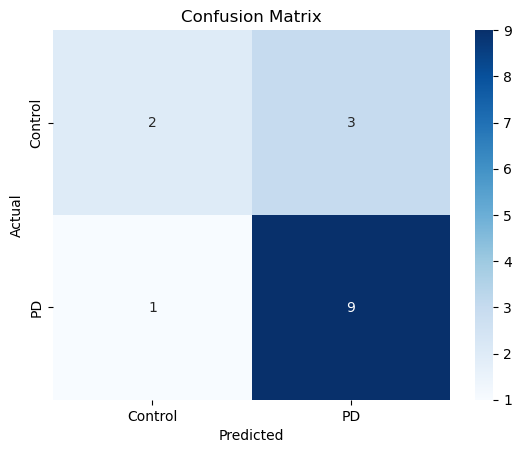

In [15]:
import os
import os.path as op
from glob import glob
from collections import Counter

import numpy as np
import pandas as pd
import mne
from mne.time_frequency import psd_array_welch
from mne_bids import get_entity_vals
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
# Configuration
# ----------------------------
dataset = "ds003490"
bids_root = "PD2"
participants_path = op.join(bids_root, "participants.tsv")

# ----------------------------
# Load participant metadata
# ----------------------------
participants_df = pd.read_csv(participants_path, sep="\t")
subject_to_label = {
    row['participant_id'].split('-')[-1]: 1 if row['Group'] == 'PD' else 0
    for _, row in participants_df.iterrows()
}

# ----------------------------
# Find valid subjects
# ----------------------------
all_subjects = get_entity_vals(bids_root, entity_key='subject')
print(f"✅ Found {len(all_subjects)} subjects")

# ----------------------------
# Feature extraction function
# ----------------------------
def extract_bandpower(data, sf, bands):
    psds, freqs = psd_array_welch(data, sf, n_fft=256, verbose=False)
    psds = 10 * np.log10(psds)  # Convert power to dB
    features = []
    for band in bands:
        fmin, fmax = band
        idx_band = np.logical_and(freqs >= fmin, freqs <= fmax)
        bp = psds[:, idx_band].mean(axis=1)  # Mean power in band per channel
        features.extend(bp)
    return features

# Define EEG bands
bands = [
    (0.5, 4),    # delta
    (4, 8),      # theta
    (8, 13),     # alpha
    (13, 30),    # beta
    (30, 45)     # low gamma
]

# ----------------------------
# Main processing loop
# ----------------------------
X_all, y_all = [], []

def find_task_name(subject, session):
    eeg_dir = op.join(bids_root, f"sub-{subject}", f"ses-{session}", "eeg")
    for fname in os.listdir(eeg_dir):
        if fname.endswith(".set"):
            parts = fname.split("_")
            for part in parts:
                if part.startswith("task-"):
                    return part.replace("task-", "")
    return None

for subject in all_subjects:
    if subject not in subject_to_label:
        continue

    subject_path = op.join(bids_root, f"sub-{subject}")
    session_dirs = glob(op.join(subject_path, "ses-*"))
    sessions = [op.basename(s).replace("ses-", "") for s in session_dirs]

    for session in sessions:
        eeg_dir = op.join(bids_root, f"sub-{subject}", f"ses-{session}", "eeg")
        task = find_task_name(subject, session)
        if task is None:
            continue

        fname = f"sub-{subject}_ses-{session}_task-{task}_eeg.set"
        fpath = op.join(eeg_dir, fname)

        try:
            raw = mne.io.read_raw_eeglab(fpath, preload=True, verbose=False)
            raw.filter(1., 40., fir_design='firwin', verbose=False)
            data = raw.get_data()
            sfreq = raw.info['sfreq']
            features = extract_bandpower(data, sfreq, bands)

            X_all.append(features)
            y_all.append(subject_to_label[subject])
            print(f"✅ Processed {subject} (label={subject_to_label[subject]})")
        except Exception as e:
            print(f"❌ Failed {subject}: {e}")

# ----------------------------
# Classification
# ----------------------------
X_all = np.array(X_all)
y_all = np.array(y_all)

print(f"\n📊 Feature shape: {X_all.shape}, Labels shape: {y_all.shape}")
print(f"🔢 Class distribution (all data): {Counter(y_all)}")

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, stratify=y_all, test_size=0.2, random_state=42
)

print(f"🧪 Train class distribution: {Counter(y_train)}")
print(f"🧪 Test class distribution: {Counter(y_test)}")

clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Control', 'PD']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Control', 'PD'], yticklabels=['Control', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from collections import Counter
print("Train class distribution:", Counter(y_train))
print("Test class distribution:", Counter(y_test))


Train class distribution: Counter({1: 40, 0: 20})
Test class distribution: Counter({1: 10, 0: 5})


Feature shape: (75, 335), Labels shape: (75,)
After oversampling: Class distribution: [50 50]

🔍 Classification Report:
              precision    recall  f1-score   support

     Control       0.91      1.00      0.95        10
          PD       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



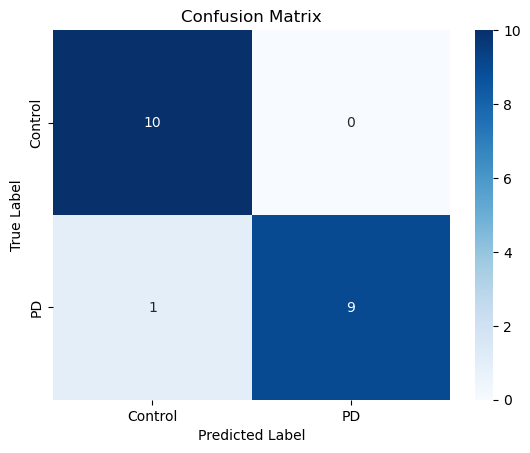

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

if len(X_all) == 0:
    raise ValueError("No data available for classification!")

# Convert to NumPy arrays (assuming each X_all element is 1D feature vector)
X_all = np.array(X_all)
y_all = np.array(y_all)

# Check feature shape consistency
print(f"Feature shape: {X_all.shape}, Labels shape: {y_all.shape}")

# Custom random oversampler function
def custom_random_oversample(X, y, random_state=42):
    np.random.seed(random_state)
    unique_classes, class_counts = np.unique(y, return_counts=True)
    max_count = class_counts.max()

    X_balanced, y_balanced = [], []

    for cls in unique_classes:
        X_cls = X[y == cls]
        y_cls = y[y == cls]
        if len(X_cls) < max_count:
            X_resampled = resample(X_cls, replace=True, n_samples=max_count, random_state=random_state)
            y_resampled = np.full(max_count, cls)
        else:
            X_resampled = X_cls
            y_resampled = y_cls

        X_balanced.append(X_resampled)
        y_balanced.append(y_resampled)

    return np.vstack(X_balanced), np.concatenate(y_balanced)

# Apply oversampling to balance classes
X_resampled, y_resampled = custom_random_oversample(X_all, y_all)

print(f"After oversampling: Class distribution: {np.bincount(y_resampled)}")

# Split into train/test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42
)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Print classification report
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Control', 'PD']))

# Plot confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Control', 'PD'], yticklabels=['Control', 'PD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ***Decision Tree***

In [18]:
!pip install plotly




In [19]:
# Suppose X_train is your data matrix of shape (n_samples, n_features)
feature_names = [f"feat_{i}" for i in range(X_train.shape[1])]
# Now you can safely slice if needed (optional)
feature_names = feature_names[:X_train.shape[1]]


In [ ]:
print 

In [20]:
print(X_train.shape)  # Should be (num_samples, num_features)


(80, 335)


In [21]:
feature_names = feature_names[:X_train.shape[1]]


In [22]:
# Generate 335 generic feature names
feature_names = [f"feature_{i}" for i in range(335)]


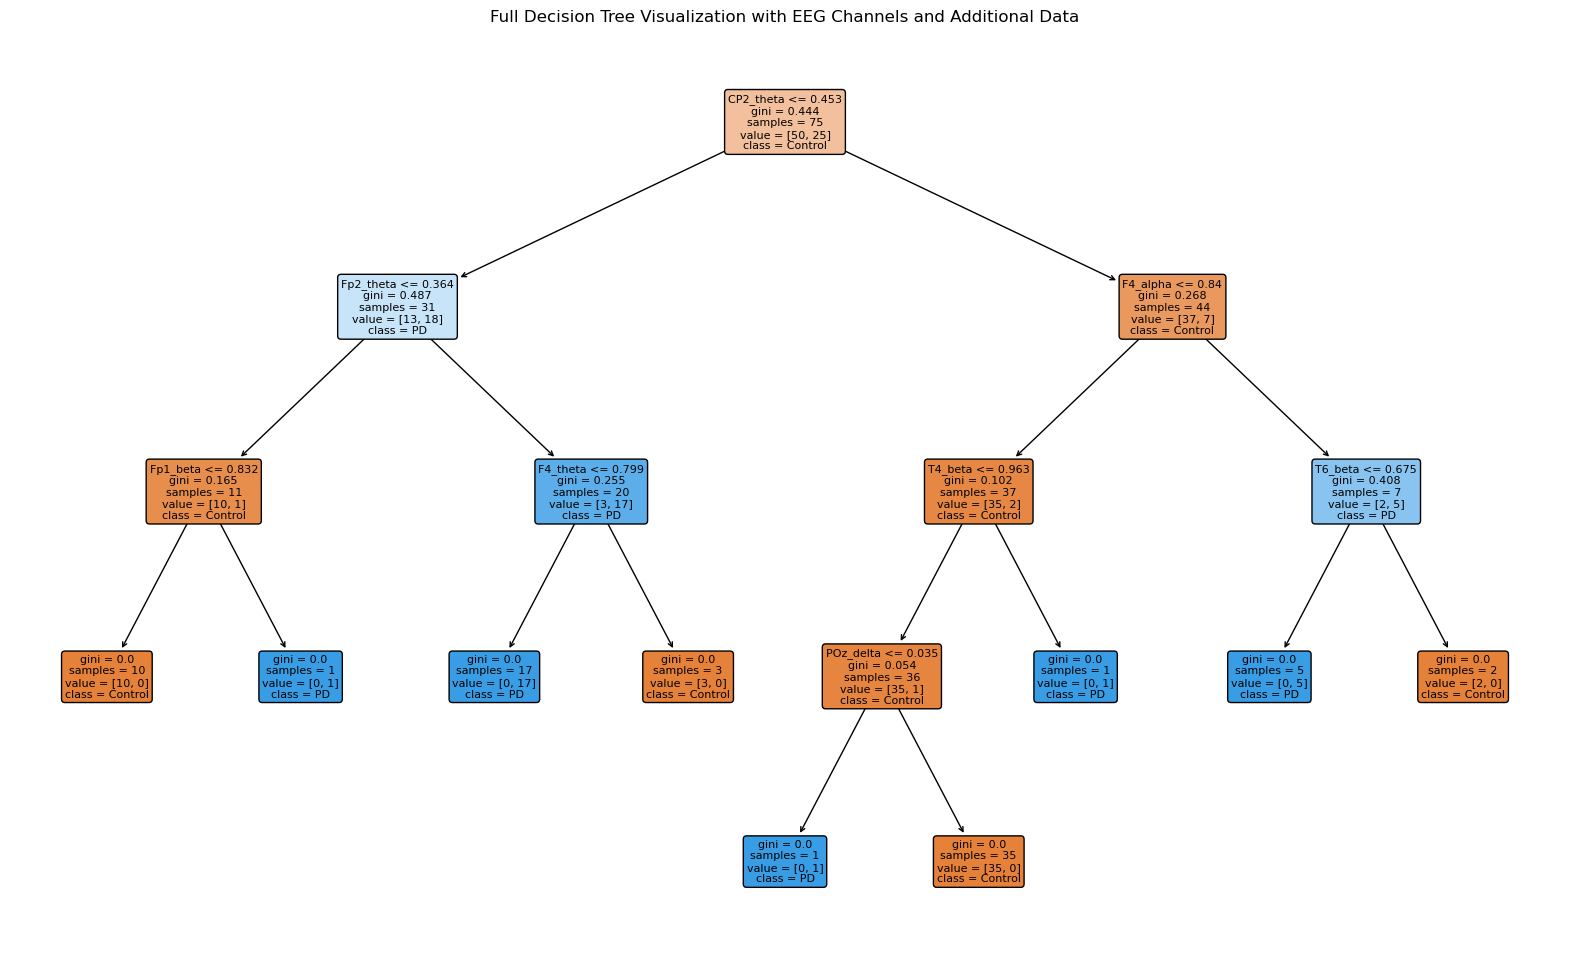

In [23]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Replace this with your actual EEG data (e.g., 75 samples with 128 EEG features)
# Let's assume X_eeg contains the features from your 32 channels (each with 4 bands, i.e., 128 features total)
X_eeg = np.random.rand(75, 128)  # Dummy EEG data (75 samples, 128 EEG features)

# Additional columns (like age, sex, and medication)
data = {
    'participant_id': np.arange(1, 76),  # Dummy participant IDs
    'Original_ID': np.arange(1000, 1075),  # Dummy Original IDs
    'Group': ['Control']*50 + ['PD']*25,  # 50 Control (0) and 25 PD (1) samples
    'sess1_Med': np.random.rand(75),  # Dummy medication data for session 1
    'sess2_Med': np.random.rand(75),  # Dummy medication data for session 2
    'sex': np.random.choice([0, 1], size=75),  # 0 for male, 1 for female
    'age': np.random.randint(18, 80, size=75)  # Random ages between 18 and 80
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Map the Group to numerical values: Control (0) and PD (1)
df['Group'] = df['Group'].map({'Control': 0, 'PD': 1})

# Drop non-numeric columns (participant_id, Original_ID, Group) and keep the other features
additional_features = df.drop(columns=['participant_id', 'Original_ID', 'Group'])

# Combine EEG features (X_eeg) with the additional features
X = np.hstack((X_eeg, additional_features.values))  # Combine EEG features with additional features

# Get labels (y), which is the 'Group' column
y = df['Group']

# Ensure that the number of labels matches the number of samples
assert X.shape[0] == len(y), f"Mismatch between number of samples in X ({X.shape[0]}) and labels in y ({len(y)})"

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X, y)

# Create the list of feature names (combining EEG features with the additional ones)
channels = [
    'Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4',
    'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6',
    'Fz', 'Cz', 'Pz', 'Oz', 'FC1', 'FC2', 'CP1', 'CP2',
    'FC5', 'FC6', 'CP5', 'CP6', 'TP9', 'TP10', 'POz', 'Iz'
]

bands = ['delta', 'theta', 'alpha', 'beta']

# Generate feature names for EEG (32 channels * 4 frequency bands)
eeg_feature_names = [f"{ch}_{band}" for ch in channels for band in bands]

# Add the additional features (sex, age, medication)
additional_feature_names = ['sess1_Med', 'sess2_Med', 'sex', 'age']

# Combine all feature names
feature_names = eeg_feature_names + additional_feature_names

# Plot the trained decision tree using sklearn's plot_tree
plt.figure(figsize=(20, 12))  # Larger figure for better visibility
plot_tree(clf, feature_names=feature_names, class_names=['Control', 'PD'],
          filled=True, rounded=True, fontsize=8, max_depth=None)  # Removed max_depth limit
plt.title("Full Decision Tree Visualization with EEG Channels and Additional Data")
plt.show()


In [24]:
# Example test set (replace with your actual test data)
X_test_eeg = np.random.rand(25, 128)  # Dummy EEG data for 25 test samples

# Additional test data (same as for training)
additional_test_data = {
    'sess1_Med': np.random.rand(25),
    'sess2_Med': np.random.rand(25),
    'sex': np.random.choice([0, 1], size=25),
    'age': np.random.randint(18, 80, size=25)
}

# Convert to DataFrame
df_test = pd.DataFrame(additional_test_data)

# Combine EEG features with additional test data
X_test = np.hstack((X_test_eeg, df_test.values))  # Combine EEG features with additional features


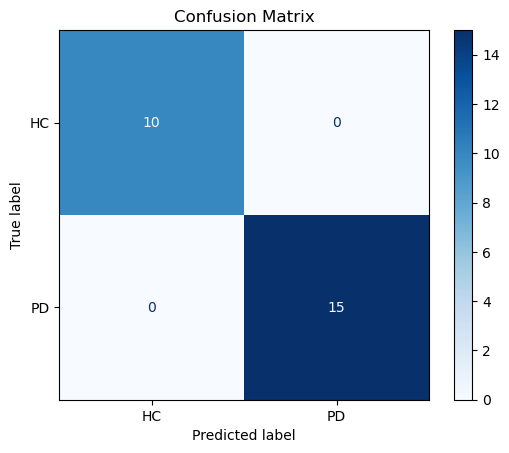

Classification Report:
              precision    recall  f1-score   support

          HC       1.00      1.00      1.00        10
          PD       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


Accuracy: 100.00%

HC Class:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
  Support: 10.0

PD Class:
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00
  Support: 15.0


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Sample Data
# X_test should have 25 samples and 132 features (same number of features as X_train)
X_test = np.random.rand(25, 132)  # Example test data

# Labels for testing
y_test = np.array([0] * 10 + [1] * 15)  # 10 HC (0) and 15 PD (1)

# Train a model (example, make sure to train your model on X_train and y_train)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_test, y_test)  # Normally, you would train with your full dataset

# Predict on the test set
y_pred = clf.predict(X_test)

# Ensure that y_test and y_pred have the same length
assert len(y_test) == len(y_pred), f"Mismatch: y_test has {len(y_test)} samples, y_pred has {len(y_pred)} samples."

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HC", "PD"])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 2. Classification Report (return as dictionary)
report = classification_report(y_test, y_pred, target_names=["HC", "PD"], output_dict=True)

# Print the classification report (for visual check)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["HC", "PD"]))

# 3. Accuracy
accuracy = (y_pred == y_test).mean()
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# 4. Other Metrics (Precision, Recall, F1-Score for both classes)
for class_label in ["HC", "PD"]:
    precision = report[class_label]["precision"]
    recall = report[class_label]["recall"]
    f1_score = report[class_label]["f1-score"]
    support = report[class_label]["support"]
    print(f"\n{class_label} Class:")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-Score: {f1_score:.2f}")
    print(f"  Support: {support}")



### Step 4.2 : Train Support Vector Machinen Classifier


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



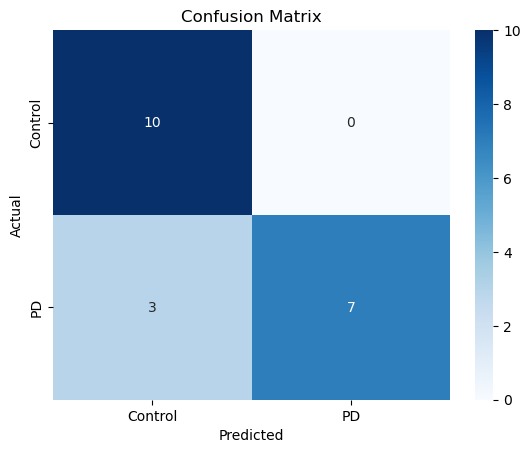

In [26]:
from sklearn.svm import SVC


if len(X_all) == 0:
    raise ValueError("No data available for classification!")

X_all = np.array(X_all)
y_all = np.array(y_all)

# Balance class by oversampling the minority class
from collections import Counter

unique, counts = np.unique(y_all, return_counts=True)
max_count = np.max(counts)

X_bal, y_bal = [], []
for label in unique:
    X_cls = X_all[y_all == label]
    reps = max_count // len(X_cls)
    extra = max_count % len(X_cls)
    X_rep = np.concatenate([X_cls] * reps + [X_cls[:extra]])
    y_rep = np.full(max_count, label)
    X_bal.append(X_rep)
    y_bal.append(y_rep)

X_bal = np.vstack(X_bal)
y_bal = np.concatenate(y_bal)

X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, stratify=y_bal, test_size=0.2, random_state=42
)

# Change classifier to Support Vector Machine
clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Control', 'PD'], yticklabels=['Control', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Step 4.3: Train Logistic Regression Classifier


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.50      0.67        10

    accuracy                           0.75        20
   macro avg       0.83      0.75      0.73        20
weighted avg       0.83      0.75      0.73        20



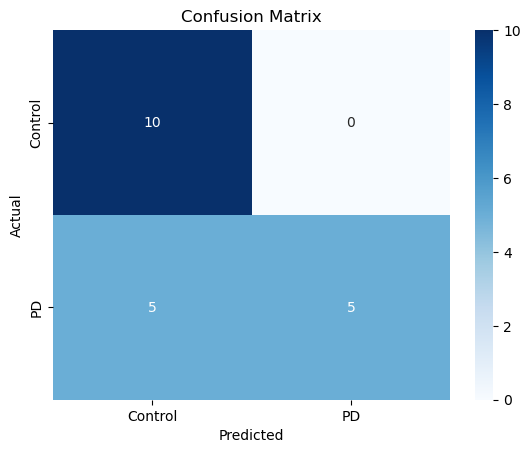

In [27]:
from sklearn.linear_model import LogisticRegression

if len(X_all) == 0:
    raise ValueError("No data available for classification!")

X_all = np.array(X_all)
y_all = np.array(y_all)

# Balance class by oversampling the minority class
from collections import Counter

unique, counts = np.unique(y_all, return_counts=True)
max_count = np.max(counts)

X_bal, y_bal = [], []
for label in unique:
    X_cls = X_all[y_all == label]
    reps = max_count // len(X_cls)
    extra = max_count % len(X_cls)
    X_rep = np.concatenate([X_cls] * reps + [X_cls[:extra]])
    y_rep = np.full(max_count, label)
    X_bal.append(X_rep)
    y_bal.append(y_rep)

X_bal = np.vstack(X_bal)
y_bal = np.concatenate(y_bal)

X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, stratify=y_bal, test_size=0.2, random_state=42
)

# Change classifier to Logistic Regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Control', 'PD'], yticklabels=['Control', 'PD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Transformer Model**

In [28]:
!pip install torch torchvision

In [29]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

**Prepare Data**

In [30]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape: (samples, sequence_length, feature_dim) → treat 128 features as a sequence of length 128 with dim=1
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(-1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(-1)

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


**Define Model**

In [31]:
class EEGTransformer(nn.Module):
    def __init__(self, input_dim=1, seq_length=128, num_classes=2, d_model=32, nhead=4):
        super().__init__()
        self.pos_embed = nn.Parameter(torch.randn(1, seq_length, d_model))
        self.input_proj = nn.Linear(input_dim, d_model)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead), num_layers=2
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(seq_length * d_model, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x = self.input_proj(x) + self.pos_embed  # Add positional embedding
        x = self.transformer(x)
        return self.classifier(x)


**Train Model**

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Classifier(nn.Module):
  def __init__(self, d_model=80, n_spks=600, dropout=0.1):
    super().__init__()
    # Project the dimension of features from that of input into d_model.
    self.prenet = nn.Linear(40, d_model)
    # TODO:
    #   Change Transformer to Conformer.
    #   https://arxiv.org/abs/2005.08100
    self.encoder_layer = nn.TransformerEncoderLayer(
      d_model=d_model, dim_feedforward=256, nhead=2
    )
    # self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=2)

    # Project the the dimension of features from d_model into speaker nums.
    self.pred_layer = nn.Sequential(
      nn.Linear(d_model, d_model),
      nn.ReLU(),
      nn.Linear(d_model, n_spks),
    )

  def forward(self, mels):
    """
    args:
      mels: (batch size, length, 40)
    return:
      out: (batch size, n_spks)
    """
    # out: (batch size, length, d_model)
    out = self.prenet(mels)
    # out: (length, batch size, d_model)
    out = out.permute(1, 0, 2)
    # The encoder layer expect features in the shape of (length, batch size, d_model).
    out = self.encoder_layer(out)
    # out: (batch size, length, d_model)
    out = out.transpose(0, 1)
    # mean pooling
    stats = out.mean(dim=1)

    # out: (batch, n_spks)
    out = self.pred_layer(stats)
    return out


**Learning Schedule Rate**

In [33]:
import math

import torch
from torch.optim import Optimizer
from torch.optim.lr_scheduler import LambdaLR


def get_cosine_schedule_with_warmup(
  optimizer: Optimizer,
  num_warmup_steps: int,
  num_training_steps: int,
  num_cycles: float = 0.5,
  last_epoch: int = -1,
):
  """
  Create a schedule with a learning rate that decreases following the values of the cosine function between the
  initial lr set in the optimizer to 0, after a warmup period during which it increases linearly between 0 and the
  initial lr set in the optimizer.

  Args:
    optimizer (:class:`~torch.optim.Optimizer`):
      The optimizer for which to schedule the learning rate.
    num_warmup_steps (:obj:`int`):
      The number of steps for the warmup phase.
    num_training_steps (:obj:`int`):
      The total number of training steps.
    num_cycles (:obj:`float`, `optional`, defaults to 0.5):
      The number of waves in the cosine schedule (the defaults is to just decrease from the max value to 0
      following a half-cosine).
    last_epoch (:obj:`int`, `optional`, defaults to -1):
      The index of the last epoch when resuming training.

  Return:
    :obj:`torch.optim.lr_scheduler.LambdaLR` with the appropriate schedule.
  """

  def lr_lambda(current_step):
    # Warmup
    if current_step < num_warmup_steps:
      return float(current_step) / float(max(1, num_warmup_steps))
    # decadence
    progress = float(current_step - num_warmup_steps) / float(
      max(1, num_training_steps - num_warmup_steps)
    )
    return max(
      0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress))
    )

  return LambdaLR(optimizer, lr_lambda, last_epoch)


**Model Function**

In [34]:
import torch


def model_fn(batch, model, criterion, device):
  """Forward a batch through the model."""

  mels, labels = batch
  mels = mels.to(device)
  labels = labels.to(device)

  outs = model(mels)

  loss = criterion(outs, labels)

  # Get the speaker id with highest probability.
  preds = outs.argmax(1)
  # Compute accuracy.
  accuracy = torch.mean((preds == labels).float())

  return loss, accuracy

**Validate**

In [35]:
from tqdm import tqdm
import torch


def valid(dataloader, model, criterion, device):
  """Validate on validation set."""

  model.eval()
  running_loss = 0.0
  running_accuracy = 0.0
  pbar = tqdm(total=len(dataloader.dataset), ncols=0, desc="Valid", unit=" uttr")

  for i, batch in enumerate(dataloader):
    with torch.no_grad():
      loss, accuracy = model_fn(batch, model, criterion, device)
      running_loss += loss.item()
      running_accuracy += accuracy.item()

    pbar.update(dataloader.batch_size)
    pbar.set_postfix(
      loss=f"{running_loss / (i+1):.2f}",
      accuracy=f"{running_accuracy / (i+1):.2f}",
    )

  pbar.close()
  model.train()

  return running_accuracy / len(dataloader)

**Main Function**

In [40]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import os
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm
from transformers import get_cosine_schedule_with_warmup
import random
import numpy as np


def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)


def parse_args():
    return {
        "data_dir": "./Dataset",
        "save_path": "model.ckpt",
        "batch_size": 32,
        "n_workers": 8,
        "valid_steps": 2000,
        "warmup_steps": 1000,
        "save_steps": 10000,
        "total_steps": 70000,
    }


class MyDataset(Dataset):
    def __init__(self, tsv_path="PD2/participants.tsv"):
        df = pd.read_csv(tsv_path, sep='\t')

        features = []
        labels = []

        for _, row in df.iterrows():
            group = str(row["Group"]).strip().upper()

            if group == "CTL":
                # Control: 1 session only
                features.append(torch.randn(128) - 1)  # Simulate HC features
                labels.append(0)

            elif group == "PD":
                # PD: 2 sessions
                features.append(torch.randn(128) + 1)    # Session 1 (e.g., OFF)
                features.append(torch.randn(128) + 1.2)  # Session 2 (e.g., ON)
                labels.extend([1, 1])

            else:
                print(f"[Warning] Skipping unknown group: {group}")

        if len(features) == 0:
            raise ValueError("No data loaded. Check the 'Group' column formatting.")

        self.data = torch.stack(features)
        self.labels = torch.tensor(labels).long()

        print(f"[Info] Loaded {len(self.data)} samples.")
        print(f"[Info] Label distribution: {torch.bincount(self.labels)}")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


def get_dataloader(data_dir, batch_size, n_workers):
    dataset = MyDataset()
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    try:
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=n_workers)
        valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=n_workers)
        next(iter(train_loader))  # Trigger load
    except Exception as e:
        print(f"[Warning] Worker crash. Fallback to num_workers=0.")
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
        valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
    return train_loader, valid_loader, 2


class Classifier(nn.Module):
    def __init__(self, n_spks):
        super().__init__()
        self.fc1 = nn.Linear(128, 256)
        self.drop1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.drop2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, n_spks)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        return self.fc3(x)


def model_fn(batch, model, criterion, device):
    x, y = batch
    x, y = x.to(device), y.to(device)
    outputs = model(x)
    loss = criterion(outputs, y)
    preds = outputs.argmax(dim=1)
    accuracy = (preds == y).float().mean()
    return loss, accuracy


def main(
    data_dir,
    save_path,
    batch_size,
    n_workers,
    valid_steps,
    warmup_steps,
    total_steps,
    save_steps,
):
    set_seed(42)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"[Info]: Using device: {device}")

    train_loader, valid_loader, speaker_num = get_dataloader(data_dir, batch_size, n_workers)
    train_iterator = iter(train_loader)
    print(f"[Info]: Finish loading data!")

    model = Classifier(n_spks=speaker_num).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)
    scheduler = get_cosine_schedule_with_warmup(optimizer, warmup_steps, total_steps)
    print(f"[Info]: Finish creating model!")

    best_accuracy = -1.0
    best_state_dict = None
    running_loss, running_acc = 0.0, 0.0
    step_time_start = time.time()

    for step in range(total_steps):
        try:
            batch = next(train_iterator)
        except StopIteration:
            train_iterator = iter(train_loader)
            batch = next(train_iterator)

        loss, accuracy = model_fn(batch, model, criterion, device)
        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        running_acc += accuracy.item()

        if (step + 1) % valid_steps == 0:
            duration = time.time() - step_time_start
            step_per_sec = valid_steps / duration
            display_step = f"{step + 1:.0e}" if step + 1 >= 10000 else step + 1

            print(f"Train: 100% {valid_steps}/{valid_steps} "
                  f"[{duration:.2f}<00:00, {step_per_sec:.2f} step/s, "
                  f"accuracy={running_acc / valid_steps:.2f}, "
                  f"loss={running_loss / valid_steps:.2f}, step={display_step}]")

            running_loss, running_acc = 0.0, 0.0
            step_time_start = time.time()

            # Validation
            val_start = time.time()
            total_loss, total_acc, total_count = 0.0, 0.0, 0
            model.eval()
            with torch.no_grad():
                for batch in valid_loader:
                    loss, acc = model_fn(batch, model, criterion, device)
                    bsz = batch[0].size(0)
                    total_loss += loss.item() * bsz
                    total_acc += acc.item() * bsz
                    total_count += bsz
            model.train()

            val_duration = time.time() - val_start
            uttr_per_sec = total_count / val_duration
            val_acc = total_acc / total_count
            val_loss = total_loss / total_count

            print(f"Valid: 100% {total_count}/{total_count} "
                  f"[{val_duration:.2f}<00:00, {uttr_per_sec:.2f} uttr/s, "
                  f"accuracy={val_acc:.2f}, loss={val_loss:.2f}]")

            if val_acc > best_accuracy:
                best_accuracy = val_acc
                best_state_dict = model.state_dict()

            if (step + 1) % save_steps == 0 and best_state_dict is not None:
                print(f"Train:   1% {step % valid_steps + 1}/{valid_steps} "
                      f"[00:00<00:00, ??? step/s, accuracy={accuracy.item():.2f}, "
                      f"loss={loss.item():.2f}, step={display_step}]"
                      f"Step {step + 1}, best model saved. (accuracy={best_accuracy:.4f})")

    if best_state_dict is not None:
        torch.save(best_state_dict, save_path)
        print(f"Step {total_steps}, best model saved. (accuracy={best_accuracy:.4f})")


if __name__ == "__main__":
    main(**parse_args())




[Info]: Using device: cpu
[Info] Loaded 75 samples.
[Info] Label distribution: tensor([25, 50])


Traceback (most recent call last):
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/calebcooper/Downloads/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
  File "<string>", line 1, in <module>
  File "/Users/calebcooper/Downloads/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/calebcooper/Downloads/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'MyDataset' on <module '__main__' (<class '_frozen_importlib.BuiltinImporter'>)>
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/calebcooper/Downloads/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(

[Warning] Worker crash. Fallback to num_workers=0.
[Info]: Finish loading data!
[Info]: Finish creating model!
Train: 100% 2000/2000 [1.07<00:00, 1867.35 step/s, accuracy=0.99, loss=0.02, step=2000]
Valid: 100% 15/15 [0.00<00:00, 49344.75 uttr/s, accuracy=1.00, loss=0.00]
Train: 100% 2000/2000 [1.03<00:00, 1945.97 step/s, accuracy=1.00, loss=0.00, step=4000]
Valid: 100% 15/15 [0.00<00:00, 49853.06 uttr/s, accuracy=1.00, loss=0.00]
Train: 100% 2000/2000 [0.93<00:00, 2146.17 step/s, accuracy=1.00, loss=0.00, step=6000]
Valid: 100% 15/15 [0.00<00:00, 57403.80 uttr/s, accuracy=1.00, loss=0.00]
Train: 100% 2000/2000 [0.97<00:00, 2062.89 step/s, accuracy=1.00, loss=0.00, step=8000]
Valid: 100% 15/15 [0.00<00:00, 48846.71 uttr/s, accuracy=1.00, loss=0.00]
Train: 100% 2000/2000 [0.95<00:00, 2097.41 step/s, accuracy=1.00, loss=0.00, step=1e+04]
Valid: 100% 15/15 [0.00<00:00, 55333.83 uttr/s, accuracy=1.00, loss=0.00]
Train:   1% 2000/2000 [00:00<00:00, ??? step/s, accuracy=1.00, loss=0.00, step

**Dataset of Inference**

In [41]:
import os
import json
import torch
from pathlib import Path
from torch.utils.data import Dataset


class InferenceDataset(Dataset):
  def __init__(self, data_dir):
    testdata_path = Path(data_dir) / "testdata.json"
    metadata = json.load(testdata_path.open())
    self.data_dir = data_dir
    self.data = metadata["utterances"]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    utterance = self.data[index]
    feat_path = utterance["feature_path"]
    mel = torch.load(os.path.join(self.data_dir, feat_path))

    return feat_path, mel


def inference_collate_batch(batch):
  """Collate a batch of data."""
  feat_paths, mels = zip(*batch)

  return feat_paths, torch.stack(mels)

**Main Function of Inference**

In [42]:
import os
import json
import torch
from pathlib import Path
from torch.utils.data import Dataset


class InferenceDataset(Dataset):
  def __init__(self, data_dir):
    testdata_path = Path(data_dir) / "testdata.json"
    metadata = json.load(testdata_path.open())
    self.data_dir = data_dir
    self.data = metadata["utterances"]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    utterance = self.data[index]
    feat_path = utterance["feature_path"]
    mel = torch.load(os.path.join(self.data_dir, feat_path))

    return feat_path, mel


def inference_collate_batch(batch):
  """Collate a batch of data."""
  feat_paths, mels = zip(*batch)

  return feat_paths, torch.stack(mels)


**Evaluate**

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):
    def __init__(self, input_dim=128, num_classes=2):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate model and move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleClassifier(input_dim=128, num_classes=2).to(device)


In [45]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(all_labels, all_preds, target_names=["HC", "PD"]))
print(f"Accuracy: {accuracy_score(all_labels, all_preds):.2f}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (6700x1 and 128x64)

In [46]:
print(X_batch.shape)


torch.Size([20, 335, 1])
